In [0]:
import tensorflow as tf
import numpy as np
import gym
from gym.envs.registration import register

In [0]:
np.identity(16)

def one_hot(x):
  return np.identity(16)[x:x + 1]

In [0]:
env = gym.make("FrozenLake-v0")

In [0]:
input_size = env.observation_space.n
output_size = env.action_space.n
learning_rate = 0.1

In [5]:
x = tf.placeholder(shape=[1, input_size], dtype=tf.float32)
W = tf.Variable(tf.random_uniform([input_size, output_size], 0, 0.01))

Qpred = tf.matmul(x, W)
y = tf.placeholder(shape=[1, output_size], dtype=tf.float32)

loss = tf.reduce_sum(tf.square(Qpred - y))
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

dis = 0.99
num_episodes = 2000
rList = []

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for step in range(num_episodes):
    # Reset the env
    s = env.reset()
    e = 1. / ((step + 100) + 1)
    r = 0
    done = False
    local_loss = []
    
    while not done:
      Qs = sess.run(Qpred, feed_dict = {x: one_hot(s)})
      if np.random.rand(1) < e:
        a = env.action_space.sample()
      else:
        a = np.argmax(Qs)
      
      s_n, reward, done, _ = env.step(a)
      if done:
        # Update Q, and no Qs+1, since it's a terminal state
        Qs[0, a] = reward
      else:
        # Obtain the Q_s1 values by feeding the new state through our network
        Qs1 = sess.run(Qpred, feed_dict={x: one_hot(s_n)})
        
        # Update Q
        Qs[0, a] = reward + dis * np.max(Qs1)
      
      
      sess.run(train, feed_dict={x: one_hot(s), y:Qs})
      r += reward
      s = s_n
    rList.append(r)

Succes rate: 0.5695


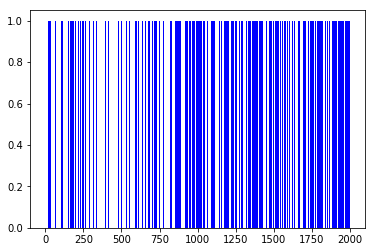

In [7]:
import matplotlib.pyplot as plt

print("Succes rate: {}".format(sum(rList)/num_episodes))
# print("Final Q-Table Values")
# print("LEFT DOWN RIGHT UP")
# print(Q)

plt.bar(range(len(rList)), rList, color='blue')
plt.show()